# CIFAR-10 Luokitteluprojekti (FCN)


### Business Understanding

The objective of this part of the assignment is to build a Fully Connected Network (FCN) model for image classification on the CIFAR-10 dataset.

The aim is to achieve reasonable classification accuracy using FCN architecture while analyzing its performance compared to CNN, and to evaluate the performance of the FCN model based on learning curve, number of parameters and training time, as well as visualize the results.

### Data Understanding

The dataset used in this assignment is **The CIFAR-10 dataset**, that consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 testing images.

### Data preparation

- Fetching data
- Reshaping data
- Split dataset to training, test and validation

In [8]:
from keras.src.utils import to_categorical
import keras
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train.reshape(-1, 32 * 32 * 3)
X_test = X_test.reshape(-1, 32 * 32 * 3)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Add stronger normalization here
import numpy as np
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0) + 1e-7
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Data for generator use
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Then convert labels to categorical format
y_train_split = to_categorical(y_train_split, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (50000, 3072)
Test data shape: (10000, 3072)


### Modeling

We build FCN model here, simple model which reached to around 50% accuracy is commented off. The heavier model got the accuracy of 62%.

In [9]:
from keras import backend as K
from keras import layers
from keras import regularizers

print(K.backend())

# Simple model ~50% accuracy
'''
inputs = keras.Input(shape=(3072,))
x = layers.Dense(256, activation="relu")(inputs)
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")
'''

# Wider and deeper FCN
inputs = keras.Input(shape=(3072,))
x = layers.Dense(1024, activation="relu", kernel_regularizer=regularizers.l2(0.0005))(inputs)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

x = layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

x = layers.Dense(256, activation="relu", kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)

x = layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.0005))(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(10, activation="softmax")(x)
improved_model = keras.Model(inputs=inputs, outputs=outputs)

tensorflow


In [10]:
improved_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,844,746 (14.67 MB)

 Trainable params: 3,840,906 (14.65 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [12]:
from keras_preprocessing.image import ImageDataGenerator

# Create data generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Reshape for augmentation, then flatten for model
# This creates random variations of your training images by
# This is mostly for CNN model, but it might help FCN model to perform better
def generate_augmented_batches(X, y, batch_size=128):
    X_reshaped = X.reshape(-1, 32, 32, 3)
    gen = datagen.flow(X_reshaped, y, batch_size=batch_size)
    while True:
        X_batch, y_batch = gen.next()
        yield X_batch.reshape(-1, 3072), y_batch

In [13]:
# Learning rate schedule
lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# Different optimizer configuration
improved_model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    metrics=["accuracy"],
)

# Early stop callback function
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True
)

# Reshape and flatten data
train_generator = generate_augmented_batches(X_train_split, y_train_split)

# Add the callbacks
history = improved_model.fit(
    train_generator,
    steps_per_epoch=len(X_train_split) // 128,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, lr_scheduler]
)


Epoch 1/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.2332 - loss: 3.6800 - val_accuracy: 0.3812 - val_loss: 3.0151 - learning_rate: 0.0100
Epoch 2/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.3425 - loss: 3.1186 - val_accuracy: 0.4182 - val_loss: 2.8382 - learning_rate: 0.0100
Epoch 3/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.3671 - loss: 2.9614 - val_accuracy: 0.4482 - val_loss: 2.7099 - learning_rate: 0.0100
Epoch 4/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.3918 - loss: 2.8431 - val_accuracy: 0.4602 - val_loss: 2.6031 - learning_rate: 0.0100
Epoch 5/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.4001 - loss: 2.7442 - val_accuracy: 0.4611 - val_loss: 2.5213 - learning_rate: 0.0100
Epoch 6/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.4155 - loss: 2.6554 - val_accuracy: 0.4868 - val_loss: 2.4312 - learning_rate: 0.0100
Epoch 7/100
312/312 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.4

### Evaluation

This code evaluates the model on the test set and prints the test loss and accuracy. It also visualizes some predictions by displaying the images and their corresponding prediction probabilities.

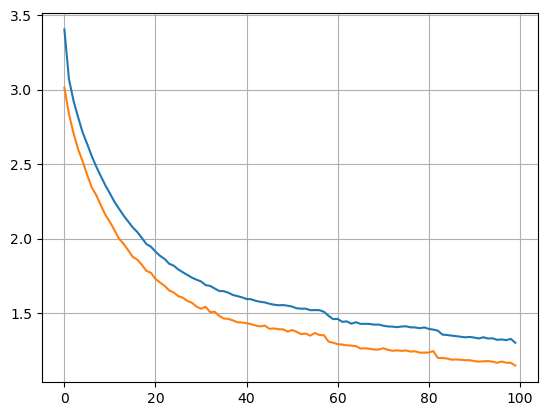

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [17]:
test_scores = improved_model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_scores[0]:.2f}")
print(f"Test accuracy: {test_scores[1]:.2f}")

Test loss: 1.16
Test accuracy: 0.63


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


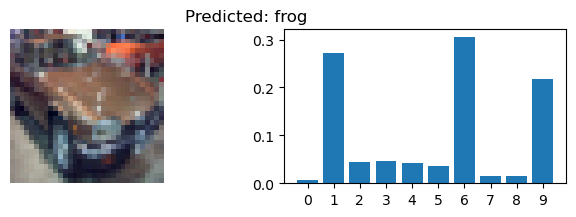

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


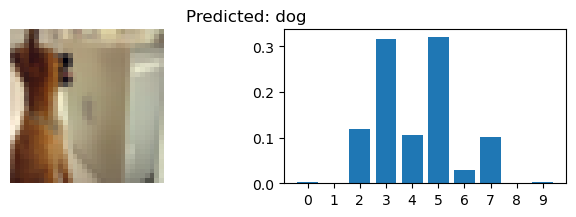

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


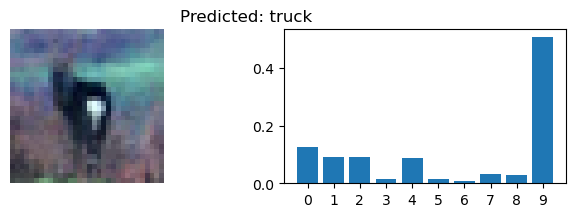

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


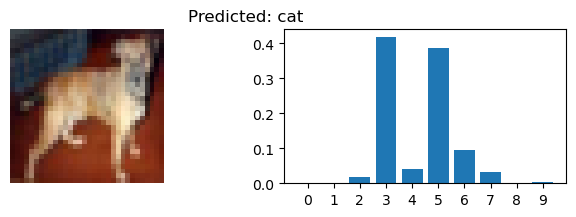

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


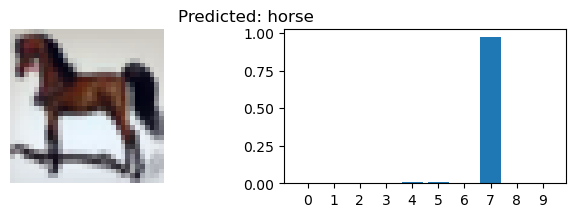

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


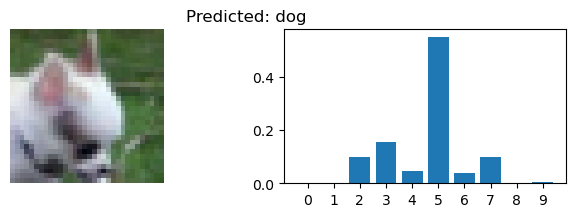

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


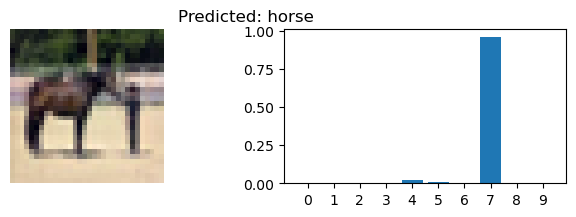

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


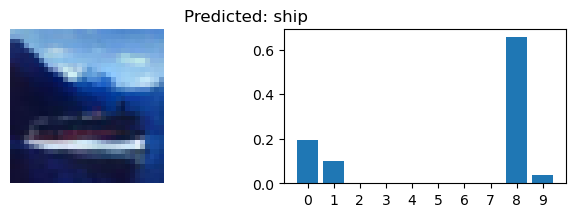

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


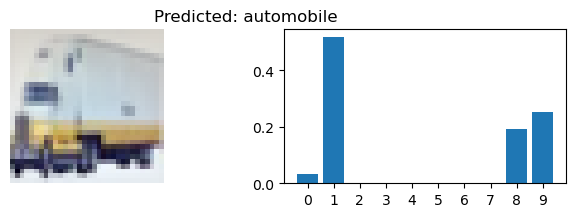

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


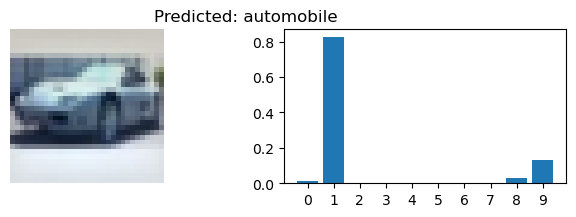

In [20]:
import numpy as np

start = 2000

int_to_label = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

for k in range(10):
    plt.figure(figsize=(8, 2))

    # Get one image
    x = np.expand_dims(X_test[start + k], axis=0)

    # Predict
    y = improved_model.predict(x)[0]

    # Fix contrast by rescaling pixel values back to [0,1]
    img_rescaled = (X_test[start + k] - X_test[start + k].min()) / \
                   (X_test[start + k].max() - X_test[start + k].min())

    # Reshape the image to original shape
    img_rescaled = img_rescaled.reshape(32, 32, 3)

    # Show the image
    plt.subplot(1, 2, 1)
    plt.imshow(img_rescaled)
    plt.axis("off")

    # Show the prediction probabilities
    plt.subplot(1, 2, 2)
    plt.bar(np.arange(10), y)
    plt.xticks(range(10))

    plt.suptitle(f"Predicted: {int_to_label.get(np.argmax(y))}")

    plt.show()

The numbers in the bar chart represent:
- 0: airplane
- 1: automobile
- 2: bird
- 3: cat
- 4: deer
- 5: dog
- 6: frog
- 7: horse
- 8: ship
- 9: truck

#### Summary

We used 100 epochs and an early stopping callback function, which will terminate the model fitting process when it detects overfitting. The fitting time of this heavy model with a CPU took about 2 hours. We achieved around 62% accuracy with 3.8 million parameters, while a simpler model (commented in the model code block) achieved approximately 50% accuracy with a fitting time of 2 minutes on an average CPU.

Although it is possible to make an FCN model perform nearly as well as a lighter CNN model, there is no advantage to using an FCN for image datasets. CNNs are better suited for capturing spatial information, which makes them more efficient for image classification tasks.

In **CNN.ipynb**, we will further explain the differences between FCN and CNN models, and why CNN is more suitable for image classification tasks.